In [3]:
# Importar la librería principal para manejar datos
import pandas as pd

# Definir la ruta al archivo CSV
file_path = 'data/train.csv'

# Cargar el archivo en un DataFrame de pandas
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas para ver cómo se ven los datos
print("Primeras 5 filas del dataset:")
display(df.head())

# Obtener un resumen de las columnas, tipos de datos y valores nulos
print("\nInformación general del DataFrame:")
df.info()

Primeras 5 filas del dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1

Estadísticas de 'SalePrice':
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


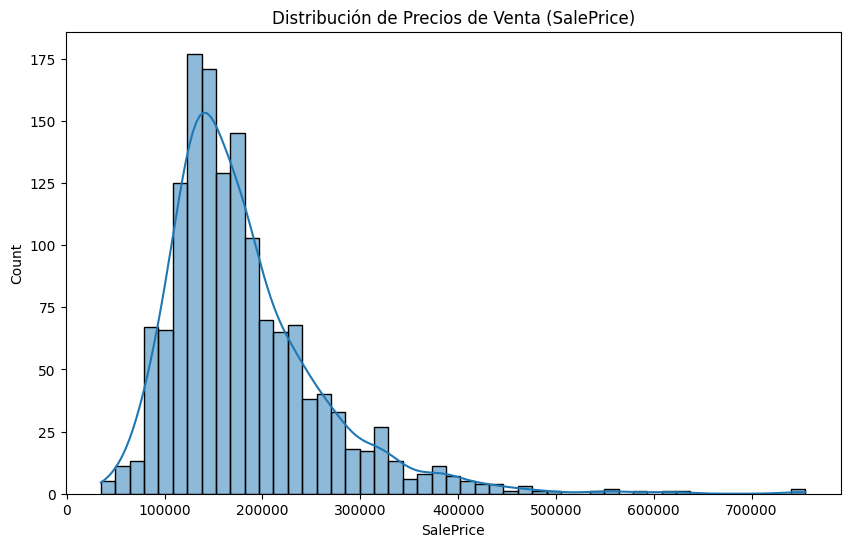


Porcentaje de valores nulos por columna:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Condition2       0.000000
dtype: float64


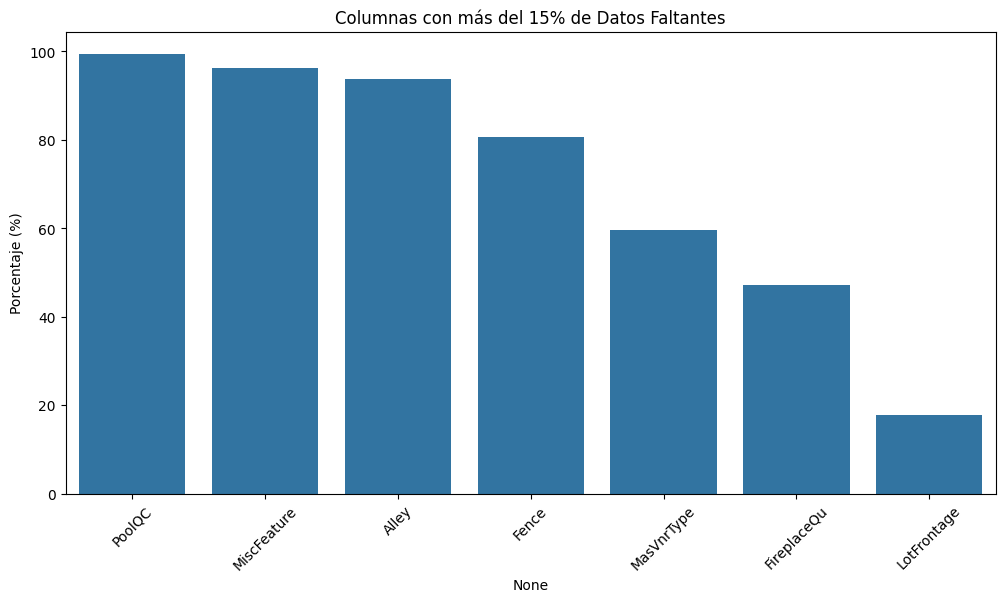

In [4]:
# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análisis de la variable objetivo: SalePrice ---

# Describir estadísticamente la columna 'SalePrice'
print("Estadísticas de 'SalePrice':")
print(df['SalePrice'].describe())

# Visualizar la distribución de SalePrice con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de Precios de Venta (SalePrice)')
plt.show()


# --- Análisis de valores nulos ---

# Calcular el porcentaje de valores nulos y mostrar los más altos
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100
print("\nPorcentaje de valores nulos por columna:")
print(missing_percentage.head(20)) # Mostramos las 20 columnas con más nulos

# Visualizar las columnas con más del 15% de valores nulos
plt.figure(figsize=(12, 6))
high_missing_percentage = missing_percentage[missing_percentage > 15]
sns.barplot(x=high_missing_percentage.index, y=high_missing_percentage)
plt.title('Columnas con más del 15% de Datos Faltantes')
plt.xticks(rotation=45)
plt.ylabel('Porcentaje (%)')
plt.show()

In [5]:
# --- 3.1: Eliminar columnas con alto porcentaje de nulos ---

# Establecemos un umbral (ej. 50%)
# Si una columna tiene más del 50% de datos nulos, la eliminamos
df_cleaned = df.drop(columns=missing_percentage[missing_percentage > 50].index)

print("Columnas eliminadas por tener >50% de nulos:")
print(list(missing_percentage[missing_percentage > 50].index))


# --- 3.2: Rellenar (imputar) los valores nulos restantes ---

# Separamos las columnas por tipo: numéricas y categóricas (texto)
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Estrategia para rellenar datos numéricos: usaremos la mediana
for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Estrategia para rellenar datos categóricos: usaremos la moda (el valor más frecuente)
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


# --- 3.3: Verificación final ---

# Comprobar que no queden valores nulos en nuestro nuevo DataFrame
print("\n¿Quedan valores nulos después de la limpieza?")
print(df_cleaned.isnull().sum().any()) # Debería devolver 'False'

Columnas eliminadas por tener >50% de nulos:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType']

¿Quedan valores nulos después de la limpieza?
False


In [6]:
# --- 4.1: Aplicar One-Hot Encoding ---

# Usamos pd.get_dummies() en nuestro dataframe limpio.
# drop_first=True es para evitar redundancia en los datos, es una buena práctica.
df_final = pd.get_dummies(df_cleaned, drop_first=True)

# --- 4.2: Ver el resultado ---

print("Forma del DataFrame original limpio:", df_cleaned.shape)
print("Forma del DataFrame final (numérico):", df_final.shape)

print("\nPrimeras filas del DataFrame final:")
display(df_final.head())

Forma del DataFrame original limpio: (1460, 76)
Forma del DataFrame final (numérico): (1460, 235)

Primeras filas del DataFrame final:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [7]:
# Importar la función para dividir los datos
from sklearn.model_selection import train_test_split

# --- 5.1: Separar en X e y ---

# 'y' es nuestra variable objetivo, la que queremos predecir
y = df_final['SalePrice']

# 'X' son todas las demás columnas, nuestras variables predictoras
X = df_final.drop('SalePrice', axis=1)


# --- 5.2: Dividir en conjuntos de entrenamiento y prueba ---

# Dividimos los datos: 80% para entrenar, 20% para probar.
# random_state=42 asegura que la división sea siempre la misma, para que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 5.3: Verificar las dimensiones ---

print("Dimensiones de X_train (entrenamiento):", X_train.shape)
print("Dimensiones de X_test (prueba):", X_test.shape)
print("Dimensiones de y_train (entrenamiento):", y_train.shape)
print("Dimensiones de y_test (prueba):", y_test.shape)

Dimensiones de X_train (entrenamiento): (1168, 234)
Dimensiones de X_test (prueba): (292, 234)
Dimensiones de y_train (entrenamiento): (1168,)
Dimensiones de y_test (prueba): (292,)


Entrenando el modelo... (puede tardar unos segundos)
¡Entrenamiento completado!
Modelo Base - RMSE por fold: [28875.75601647 36253.78685827 36935.83594797 26170.49273757
 25781.53474241]
Modelo Base - RMSE promedio (CV): 30803.48126053872

Error Cuadrático Medio (MSE): 861132414.50
Raíz del Error Cuadrático Medio (RMSE): $29345.06


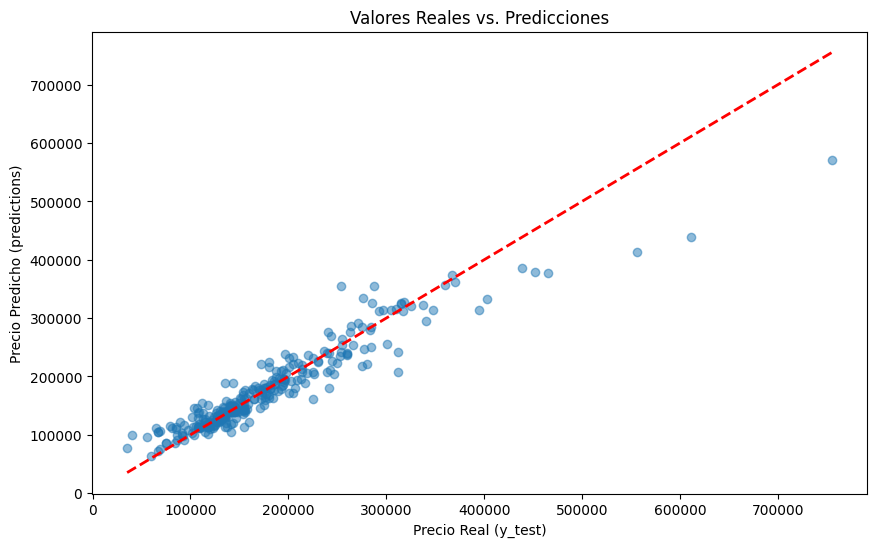

In [8]:
# Importar el modelo y las métricas de error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
# --- 6.1: Crear y entrenar el modelo ---

# Inicializamos el modelo. n_estimators es el número de "árboles" que usará.
# random_state=42 es para la reproducibilidad.
model = RandomForestRegressor(n_estimators=100, random_state=42)

print("Entrenando el modelo... (puede tardar unos segundos)")
# Entrenamos el modelo con nuestros datos de entrenamiento
model.fit(X_train, y_train)
print("¡Entrenamiento completado!")


# --- 6.2: Hacer predicciones con los datos de prueba ---

# El modelo ahora predice los precios para el conjunto de prueba (que nunca ha visto)
predictions = model.predict(X_test)

cv_scores_base = cross_val_score(
    model, X_train, y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
cv_rmse_base = np.sqrt(-cv_scores_base)
print("Modelo Base - RMSE por fold:", cv_rmse_base)
print("Modelo Base - RMSE promedio (CV):", cv_rmse_base.mean())

# Evaluación en test
base_predictions = model.predict(X_test)
base_rmse = np.sqrt(mean_squared_error(y_test, base_predictions))


# --- 6.3: Evaluar el rendimiento del modelo ---

# Calculamos el error. Usamos el Error Cuadrático Medio (MSE).
mse = mean_squared_error(y_test, predictions)
# Calculamos la Raíz del Error Cuadrático Medio (RMSE) para que sea más interpretable.
rmse = np.sqrt(mse)

print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse:.2f}")


# --- 6.4: Visualizar los resultados ---

# Un gráfico de dispersión para comparar los valores reales con las predicciones.
# Si el modelo fuera perfecto, todos los puntos estarían en la línea diagonal.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Precio Real (y_test)')
plt.ylabel('Precio Predicho (predictions)')
plt.show()

Iniciando el ajuste de hiperparámetros para el modelo complejo...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
¡Ajuste completado!

Mejores parámetros encontrados:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100}

--- Rendimiento del Modelo Optimizado (en Test Set) ---
MAE: $18,114.99
RMSE: $32,566.60
R²: 86.17%

--- Gráfico de Predicciones vs. Valores Reales ---


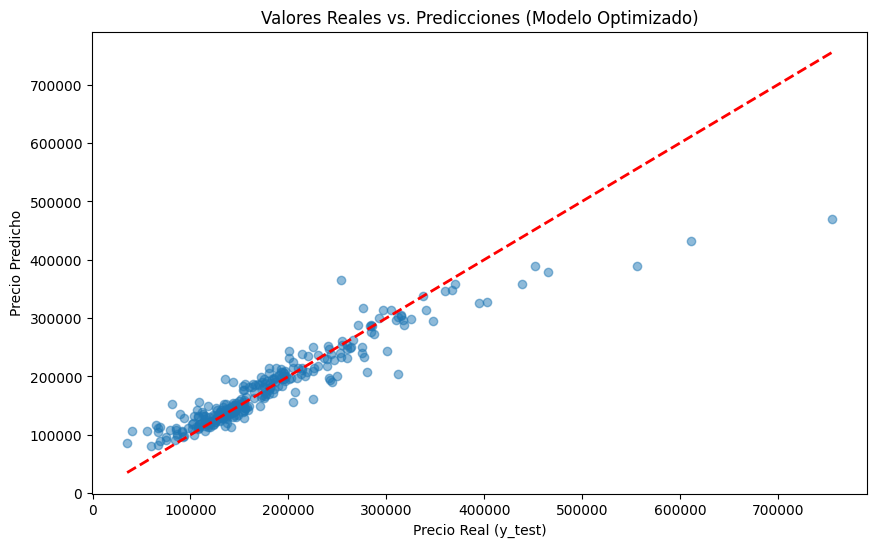

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt # Importar matplotlib

# (Se asume que X_train, y_train, X_test, y_test del modelo COMPLEJO ya existen)

# --- 1. Definir la parrilla de hiperparámetros ---
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=5)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# --- 2. Crear y configurar la búsqueda aleatoria ---
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=2,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# --- 3. Ejecutar la búsqueda ---
print("Iniciando el ajuste de hiperparámetros para el modelo complejo...")
rf_random.fit(X_train, y_train)
print("¡Ajuste completado!")

# --- 4. Obtener el mejor modelo y evaluar ---
best_model = rf_random.best_estimator_

print("\nMejores parámetros encontrados:")
print(rf_random.best_params_)

# Predicciones sobre los datos de prueba
opt_predictions = best_model.predict(X_test)

# Calcular métricas finales
opt_mae = mean_absolute_error(y_test, opt_predictions)
opt_rmse = np.sqrt(mean_squared_error(y_test, opt_predictions))
opt_r2 = r2_score(y_test, opt_predictions)

# --- 5. Mostrar los logs finales de rendimiento ---
print("\n--- Rendimiento del Modelo Optimizado (en Test Set) ---")
print(f"MAE: ${opt_mae:,.2f}")
print(f"RMSE: ${opt_rmse:,.2f}")
print(f"R²: {opt_r2:.2%}")

# --- 6. Visualizar los resultados ---
print("\n--- Gráfico de Predicciones vs. Valores Reales ---")
plt.figure(figsize=(10, 6))
# Corregimos la variable a 'opt_predictions'
plt.scatter(y_test, opt_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reales vs. Predicciones (Modelo Optimizado)')
plt.xlabel('Precio Real (y_test)')
plt.ylabel('Precio Predicho')
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# --- 1. Generar predicciones para ambos modelos ---
base_predictions = model.predict(X_test)
optimized_predictions = best_model.predict(X_test)

# --- 2. Calcular métricas para el Modelo Base ---
base_mae = mean_absolute_error(y_test, base_predictions)
base_rmse = np.sqrt(mean_squared_error(y_test, base_predictions))
base_r2 = r2_score(y_test, base_predictions)

# --- 3. Calcular métricas para el Modelo Optimizado ---
opt_mae = mean_absolute_error(y_test, optimized_predictions)
opt_rmse = np.sqrt(mean_squared_error(y_test, optimized_predictions))
opt_r2 = r2_score(y_test, optimized_predictions)

# --- 4. Crear un DataFrame de pandas para una comparación clara ---
comparison_data = {
    "Métrica": ["Error Absoluto Medio (MAE)", "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Modelo Base": [f"${base_mae:,.2f}", f"${base_rmse:,.2f}", f"{base_r2:.2%}"],
    "Modelo Optimizado": [f"${opt_mae:,.2f}", f"${opt_rmse:,.2f}", f"{opt_r2:.2%}"]
}

comparison_df = pd.DataFrame(comparison_data)

# --- 5. Imprimir la tabla de comparación ---
print("--- Tabla Comparativa de Rendimiento de Modelos ---")
display(comparison_df.set_index('Métrica'))

--- Tabla Comparativa de Rendimiento de Modelos ---


,Modelo Base,Modelo Optimizado
Métrica,,
Error Absoluto Medio (MAE),"$17,790.83","$18,114.99"
Raíz del Error Cuadrático Medio (RMSE),"$29,345.06","$32,566.60"
Coeficiente de Determinación (R²),88.77%,86.17%


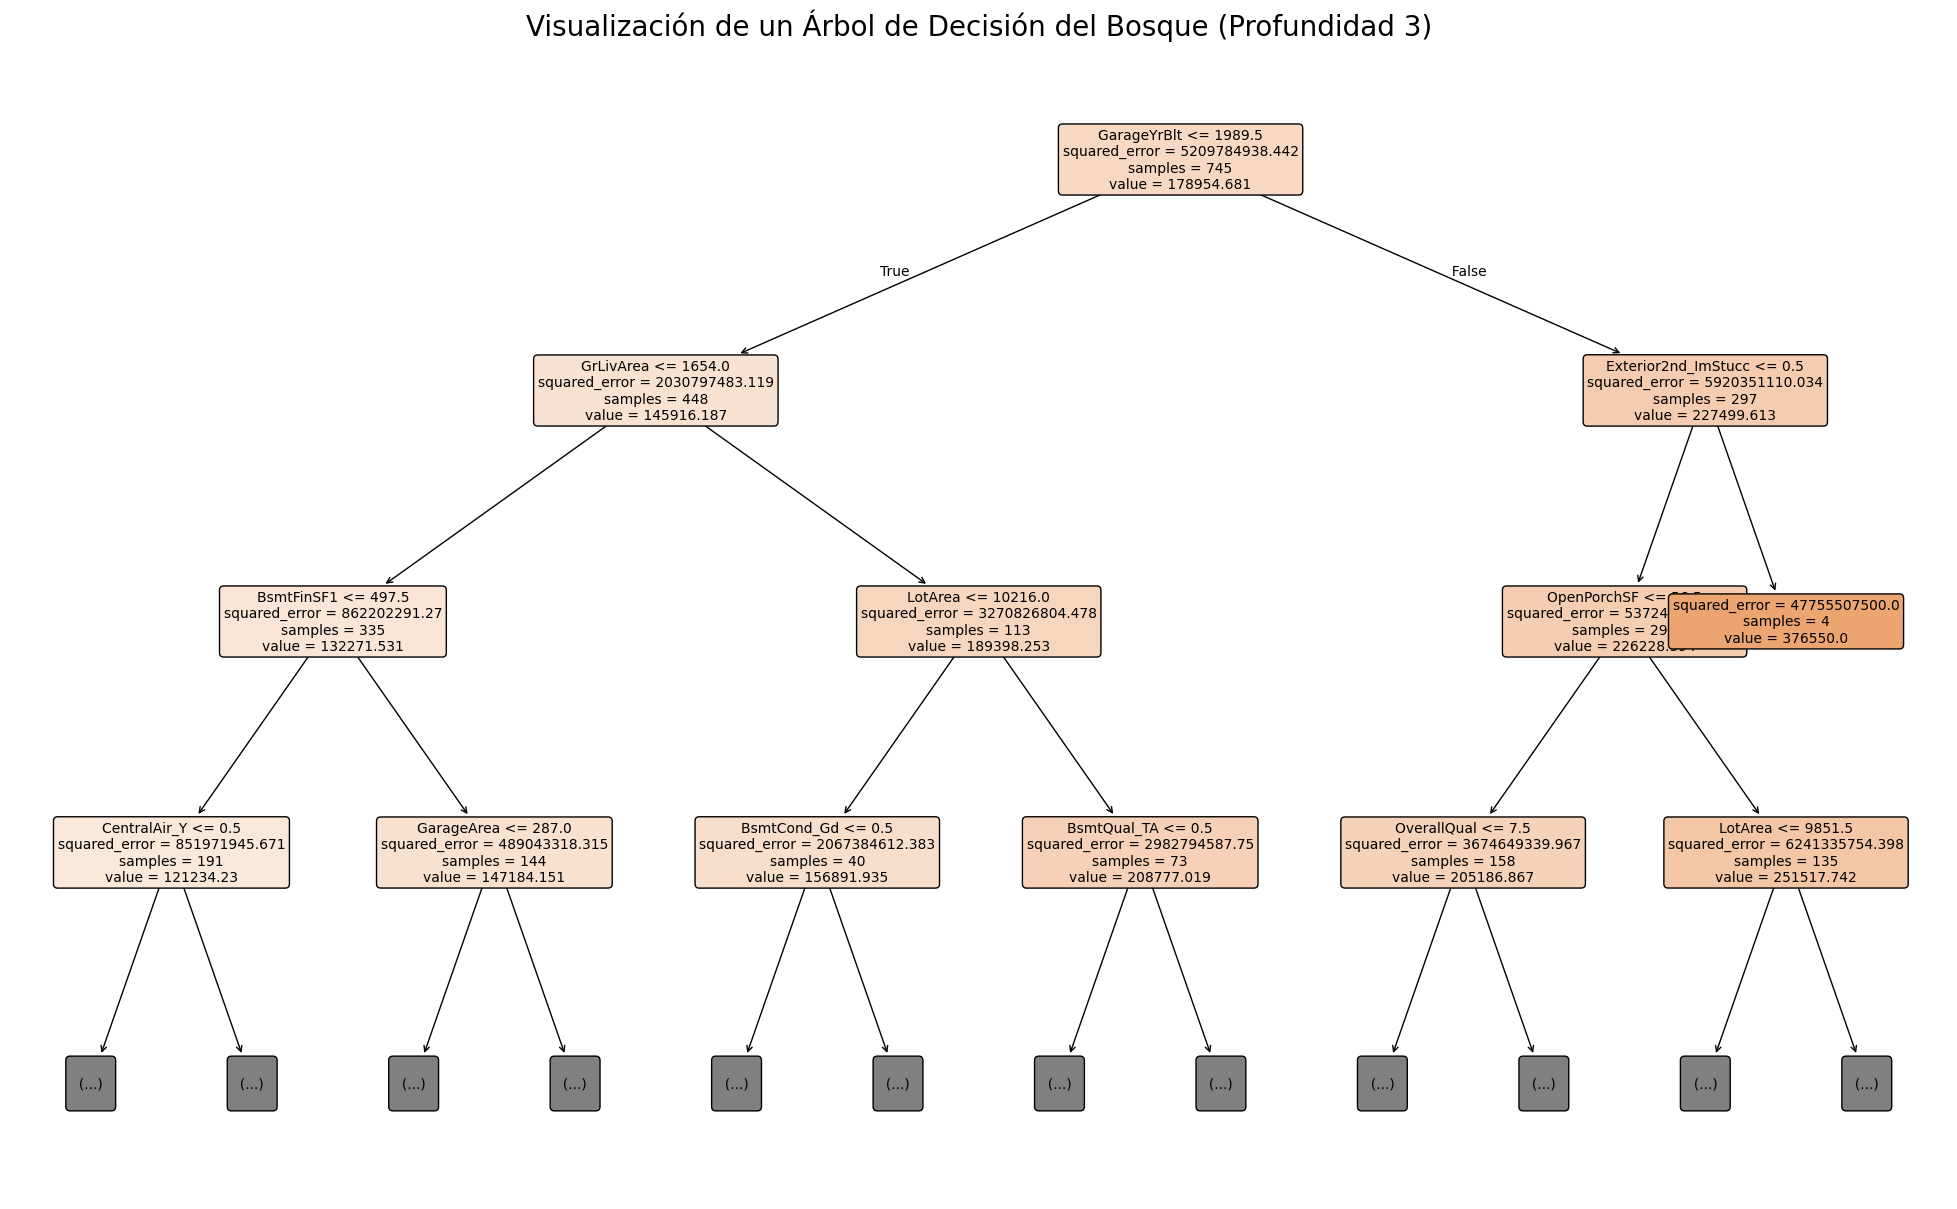

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# --- 1. Extraer y visualizar un solo árbol del modelo optimizado ---

# Seleccionamos un árbol del bosque (por ejemplo, el primero, índice 0)
single_tree = best_model.estimators_[0]

# Preparamos la figura para el gráfico
plt.figure(figsize=(25, 15))

# Dibujamos el árbol
# max_depth=3 limita la profundidad para que sea legible. ¡Quita este parámetro para ver el árbol completo!
# feature_names nos permite ver el nombre de la característica en cada nodo.
plot_tree(single_tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,  # <-- Límite para legibilidad
          fontsize=10)

plt.title("Visualización de un Árbol de Decisión del Bosque (Profundidad 3)", fontsize=20)
plt.show()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_4312\856006558.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


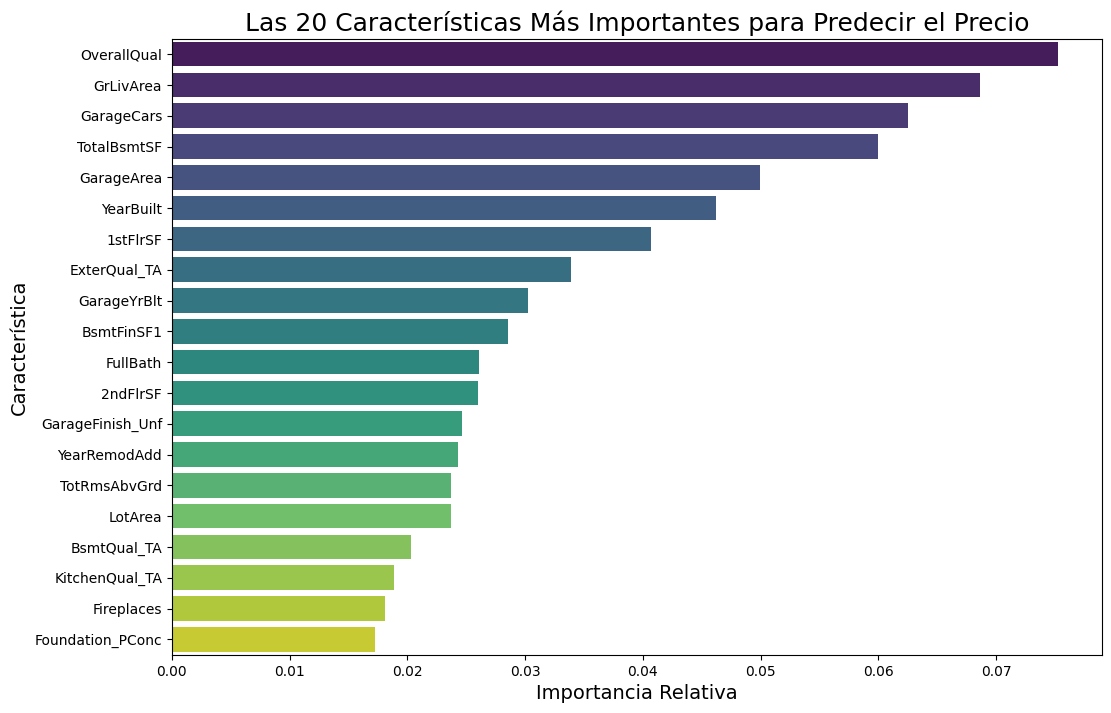

In [12]:
import pandas as pd
import seaborn as sns

# --- 2. Obtener y graficar la importancia de las características ---

# Extraemos la importancia de cada característica del modelo optimizado
importances = best_model.feature_importances_

# Creamos un DataFrame para manejar y ordenar los datos
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Ordenamos las características de la más a la menos importante
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Graficamos las 20 características más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')

plt.title('Las 20 Características Más Importantes para Predecir el Precio', fontsize=18)
plt.xlabel('Importancia Relativa', fontsize=14)
plt.ylabel('Característica', fontsize=14)
plt.show()

In [13]:
import joblib

# --- Guardar el modelo optimizado ---
# Le damos un nombre al archivo, la extensión .pkl es una convención.
filename = 'house_price_model.pkl'
joblib.dump(best_model, filename)

# --- MUY IMPORTANTE: Guardar las columnas del modelo ---
# También guardamos la lista de columnas que el modelo espera recibir.
# Esto es crucial para que el backend prepare los datos exactamente igual.
model_columns = X.columns
joblib.dump(model_columns, 'model_columns.pkl')

print(f"¡Modelo guardado exitosamente como '{filename}'!")
print(f"¡Columnas del modelo guardadas como 'model_columns.pkl'!")

¡Modelo guardado exitosamente como 'house_price_model.pkl'!
¡Columnas del modelo guardadas como 'model_columns.pkl'!


# Experimento 2: Modelo Simplificado con 10 Características

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# (Asegúrate de tener el DataFrame 'df' cargado de una celda anterior)

# 1. Seleccionar las 10 características y la variable objetivo
top_10_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
    'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd',
    'FullBath', 'TotRmsAbvGrd'
]
target_variable = 'SalePrice'

df_simple = df[top_10_features + [target_variable]].copy()

# 2. Limpieza de nulos
for col in df_simple.columns:
    if df_simple[col].isnull().any():
        df_simple[col] = df_simple[col].fillna(df_simple[col].median())

# 3. Separar en X e y
X_simple = df_simple[top_10_features]
y_simple = df_simple[target_variable]

# 4. Dividir en conjuntos de entrenamiento y prueba
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# --- 5. Definir la parrilla de hiperparámetros ---
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=5)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# --- 6. Crear y configurar la búsqueda aleatoria con Validación Cruzada ---
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=2,
    cv=5, # <-- AQUÍ ESTÁ LA VALIDACIÓN CRUZADA
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# --- 7. Ejecutar la búsqueda ---
print("Iniciando el ajuste de hiperparámetros (con validación cruzada integrada)...")
rf_random.fit(X_train_s, y_train_s)
print("¡Ajuste completado!")

# --- 8. Obtener el mejor modelo y evaluar ---
best_simple_model = rf_random.best_estimator_

print("\nMejores parámetros encontrados:")
print(rf_random.best_params_)

predictions_s_tuned = best_simple_model.predict(X_test_s)
rmse_s_tuned = np.sqrt(mean_squared_error(y_test_s, predictions_s_tuned))
r2_s_tuned = r2_score(y_test_s, predictions_s_tuned)

print("\n--- Rendimiento del Modelo Simplificado y Optimizado ---")
print(f"RMSE: ${rmse_s_tuned:,.2f}")
print(f"R²: {r2_s_tuned:.2%}")

# --- 9. GUARDAR el mejor modelo simplificado ---
joblib.dump(best_simple_model, 'simple_model.pkl')
joblib.dump(top_10_features, 'simple_model_columns.pkl')
print("\n¡Mejor modelo simplificado y columnas guardados exitosamente!")

Iniciando el ajuste de hiperparámetros (con validación cruzada integrada)...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
¡Ajuste completado!

Mejores parámetros encontrados:
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

--- Rendimiento del Modelo Simplificado y Optimizado ---
RMSE: $30,328.31
R²: 88.01%

¡Mejor modelo simplificado y columnas guardados exitosamente!


In [15]:
import pandas as pd

# --- Recolectar datos del Modelo Base ---
base_mae = mean_absolute_error(y_test, base_predictions)
base_rmse = np.sqrt(mean_squared_error(y_test, base_predictions))
base_r2 = r2_score(y_test, base_predictions)

# --- Recolectar datos del Modelo Optimizado ---
opt_mae = mean_absolute_error(y_test, optimized_predictions)
opt_rmse = np.sqrt(mean_squared_error(y_test, optimized_predictions))
opt_r2 = r2_score(y_test, optimized_predictions)

# --- Recolectar datos del Modelo Simplificado ---
# (Estos ya los calculamos en la celda anterior como rmse_s y r2_s)
simple_mae = mean_absolute_error(y_test_s, predictions_s_tuned)

# --- Crear un DataFrame para la comparación ---
final_comparison_data = {
    "Métrica": ["Error Absoluto Medio (MAE)", "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Modelo Base": [f"${base_mae:,.2f}", f"${base_rmse:,.2f}", f"{base_r2:.2%}"],
    "Modelo Optimizado": [f"${opt_mae:,.2f}", f"${opt_rmse:,.2f}", f"{opt_r2:.2%}"],
    "Modelo Simplificado (10 feat.)": [f"${simple_mae:,.2f}", f"${rmse_s_tuned:,.2f}", f"{r2_s_tuned:.2%}"]
}

final_comparison_df = pd.DataFrame(final_comparison_data)

# --- Imprimir la tabla final ---
print("--- Tabla Comparativa Final de Rendimiento de Modelos ---")
display(final_comparison_df.set_index('Métrica'))

--- Tabla Comparativa Final de Rendimiento de Modelos ---


,Modelo Base,Modelo Optimizado,Modelo Simplificado (10 feat.)
Métrica,,,
Error Absoluto Medio (MAE),"$17,790.83","$18,114.99","$19,192.40"
Raíz del Error Cuadrático Medio (RMSE),"$29,345.06","$32,566.60","$30,328.31"
Coeficiente de Determinación (R²),88.77%,86.17%,88.01%


#  EXPERIMENTO 3: MODELO SIMPLIFICADO ENRIQUECIDO

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib

# 1. Cargar el dataset enriquecido
df_enriched = pd.read_csv('data/train_enriquecido.csv')

# 2. Definir las 11 características
enriched_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
    'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd',
    'FullBath', 'TotRmsAbvGrd', 'NumeroDeEscuelasCercanas'
]
target_variable = 'SalePrice'

df_enriched_model = df_enriched[enriched_features + [target_variable]].copy()

# 3. Limpieza de Nulos
df_enriched_model['NumeroDeEscuelasCercanas'] = df_enriched_model['NumeroDeEscuelasCercanas'].fillna(df_enriched_model['NumeroDeEscuelasCercanas'].median())

# 4. Separar en X e y
X_enriched = df_enriched_model[enriched_features]
y_enriched = df_enriched_model[target_variable]

# 5. Dividir en conjuntos de entrenamiento y prueba
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_enriched, y_enriched, test_size=0.2, random_state=42)

# --- 6. Definir la parrilla de hiperparámetros ---
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=5)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# --- 7. Crear y configurar la búsqueda aleatoria ---
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=2,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# --- 8. Ejecutar la búsqueda ---
# ¡ADVERTENCIA: Este paso puede tardar varios minutos!
print("Iniciando el ajuste de hiperparámetros para el modelo enriquecido...")
rf_random.fit(X_train_e, y_train_e)
print("¡Ajuste completado!")

# --- 9. Obtener el mejor modelo y evaluar ---
best_enriched_model = rf_random.best_estimator_

print("\nMejores parámetros encontrados para el modelo enriquecido:")
print(rf_random.best_params_)

# Evaluar el modelo optimizado en el conjunto de prueba
predictions_e_tuned_simp = best_enriched_model.predict(X_test_e)
mae_e_tuned_simp = mean_absolute_error(y_test_e, predictions_e_tuned_simp)
rmse_e_tuned_simp = np.sqrt(mean_squared_error(y_test_e, predictions_e_tuned_simp))
r2_e_tuned_simp = r2_score(y_test_e, predictions_e_tuned_simp)

print("\n--- Rendimiento del Modelo Enriquecido y Optimizado ---")
print(f"MAE: ${mae_e_tuned_simp:,.2f}")
print(f"RMSE: ${rmse_e_tuned_simp:,.2f}")
print(f"R²: {r2_e_tuned_simp:.2%}")

# --- 10. GUARDAR el mejor modelo enriquecido ---
joblib.dump(best_enriched_model, 'enriched_simple_model.pkl')
joblib.dump(enriched_features, 'enriched_simple_model_columns.pkl')
print("\n¡Mejor modelo enriquecido y columnas guardados exitosamente!")

Iniciando el ajuste de hiperparámetros para el modelo enriquecido...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
¡Ajuste completado!

Mejores parámetros encontrados para el modelo enriquecido:
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

--- Rendimiento del Modelo Enriquecido y Optimizado ---
MAE: $19,170.78
RMSE: $30,399.65
R²: 87.95%

¡Mejor modelo enriquecido y columnas guardados exitosamente!


In [17]:
import pandas as pd
import numpy as np # Asegúrate de tener numpy importado

# --- Crear un DataFrame para la comparación ---
final_comparison_data = {
    "Métrica": [
        "Error Absoluto Medio (MAE)",
        "Raíz del Error Cuadrático Medio (RMSE)",
        "Coeficiente de Determinación (R²)"
    ],
    "Modelo Base": [
        f"${base_mae:,.2f}",
        f"${base_rmse:,.2f}",
        f"{base_r2:.2%}"
    ],
    "Modelo Optimizado": [
        f"${opt_mae:,.2f}",
        f"${opt_rmse:,.2f}",
        f"{opt_r2:.2%}"
    ],
    "Modelo Simplificado (10 feat.)": [
        f"${simple_mae:,.2f}",
        f"${rmse_s_tuned:,.2f}",
        f"{r2_s_tuned:.2%}"
    ],
    "Modelo Enriquecido (11 feat.)": [
        f"${mae_e_tuned_simp:,.2f}",
        f"${rmse_e_tuned_simp:,.2f}",
        f"{r2_e_tuned_simp:.2%}"
    ]
}

final_comparison_df = pd.DataFrame(final_comparison_data)

# --- Imprimir la tabla final ---
print("--- Tabla Comparativa Final de Rendimiento de Modelos (en Test Set) ---")
display(final_comparison_df.set_index('Métrica'))

--- Tabla Comparativa Final de Rendimiento de Modelos (en Test Set) ---


,Modelo Base,Modelo Optimizado,Modelo Simplificado (10 feat.),Modelo Enriquecido (11 feat.)
Métrica,,,,
Error Absoluto Medio (MAE),"$17,790.83","$18,114.99","$19,192.40","$19,170.78"
Raíz del Error Cuadrático Medio (RMSE),"$29,345.06","$32,566.60","$30,328.31","$30,399.65"
Coeficiente de Determinación (R²),88.77%,86.17%,88.01%,87.95%


In [18]:
# Configuración global para fondo oscuro y colores de tu CSS
plt.style.use('dark_background')
sns.set_theme(style='darkgrid')

# Personaliza aún más los colores y fuentes
plt.rcParams.update({
    'figure.facecolor': '#282c34',
    'axes.facecolor': '#282c34',
    'axes.edgecolor': '#61dafb',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.titlecolor': '#61dafb',
    'font.family': 'sans-serif',

    'axes.titlepad': 20,
    'axes.labelsize': 14,
    'axes.titlesize': 18,
    'legend.facecolor': '#2f4f4f',
    'legend.edgecolor': '#61dafb'
})

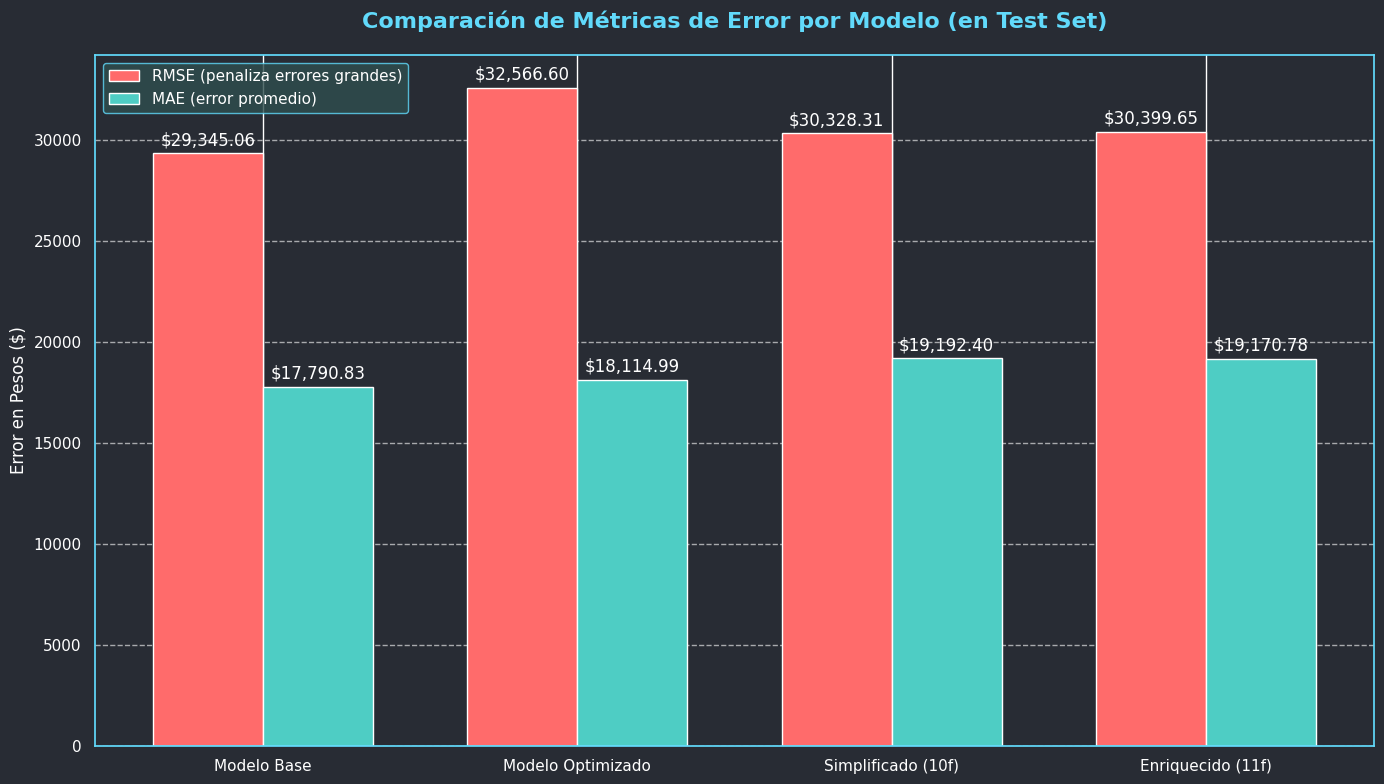

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Preparar los datos para el gráfico ---
# (Se asume que las variables de métricas de todos los modelos ya existen)

model_names = [
    'Modelo Base',
    'Modelo Optimizado',
    'Simplificado (10f)',
    'Enriquecido (11f)'
]

rmse_values = [base_rmse, opt_rmse, rmse_s_tuned, rmse_e_tuned_simp] # Usar _tuned para simplificado/enriquecido
mae_values = [base_mae, opt_mae, simple_mae, mae_e_tuned_simp]     # Usar _tuned para simplificado/enriquecido


# --- 2. Crear el gráfico de barras agrupadas ---

x = np.arange(len(model_names))  # las ubicaciones de las etiquetas
width = 0.35  # el ancho de las barras

fig, ax = plt.subplots(figsize=(14, 8))

# Barras para el RMSE
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE (penaliza errores grandes)', color='#ff6b6b')

# Barras para el MAE
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE (error promedio)', color='#4ecdc4')

# --- 3. Añadir textos, título y etiquetas ---
ax.set_ylabel('Error en Pesos ($)', fontsize=12)
ax.set_title('Comparación de Métricas de Error por Modelo (en Test Set)', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.legend(fontsize=11)

# --- CORRECCIÓN AQUÍ: Pasar una lista de strings formateados al bar_label ---
# Formatear los valores de RMSE para las etiquetas
rmse_labels = [f'${val:,.2f}' for val in rmse_values]
ax.bar_label(rects1, labels=rmse_labels, padding=3)

# Formatear los valores de MAE para las etiquetas
mae_labels = [f'${val:,.2f}' for val in mae_values]
ax.bar_label(rects2, labels=mae_labels, padding=3)
# --- FIN DE LA CORRECCIÓN ---


ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.tight_layout()

plt.show()

Este gráfico compara dos métricas de error —RMSE (Root Mean Squared Error) y MAE (Mean Absolute Error)— para cada uno de los modelos evaluados. El RMSE penaliza más fuertemente los errores grandes, mientras que el MAE representa el error promedio absoluto. Visualizar ambas métricas permite analizar no solo la precisión general de cada modelo, sino también su sensibilidad ante errores atípicos.

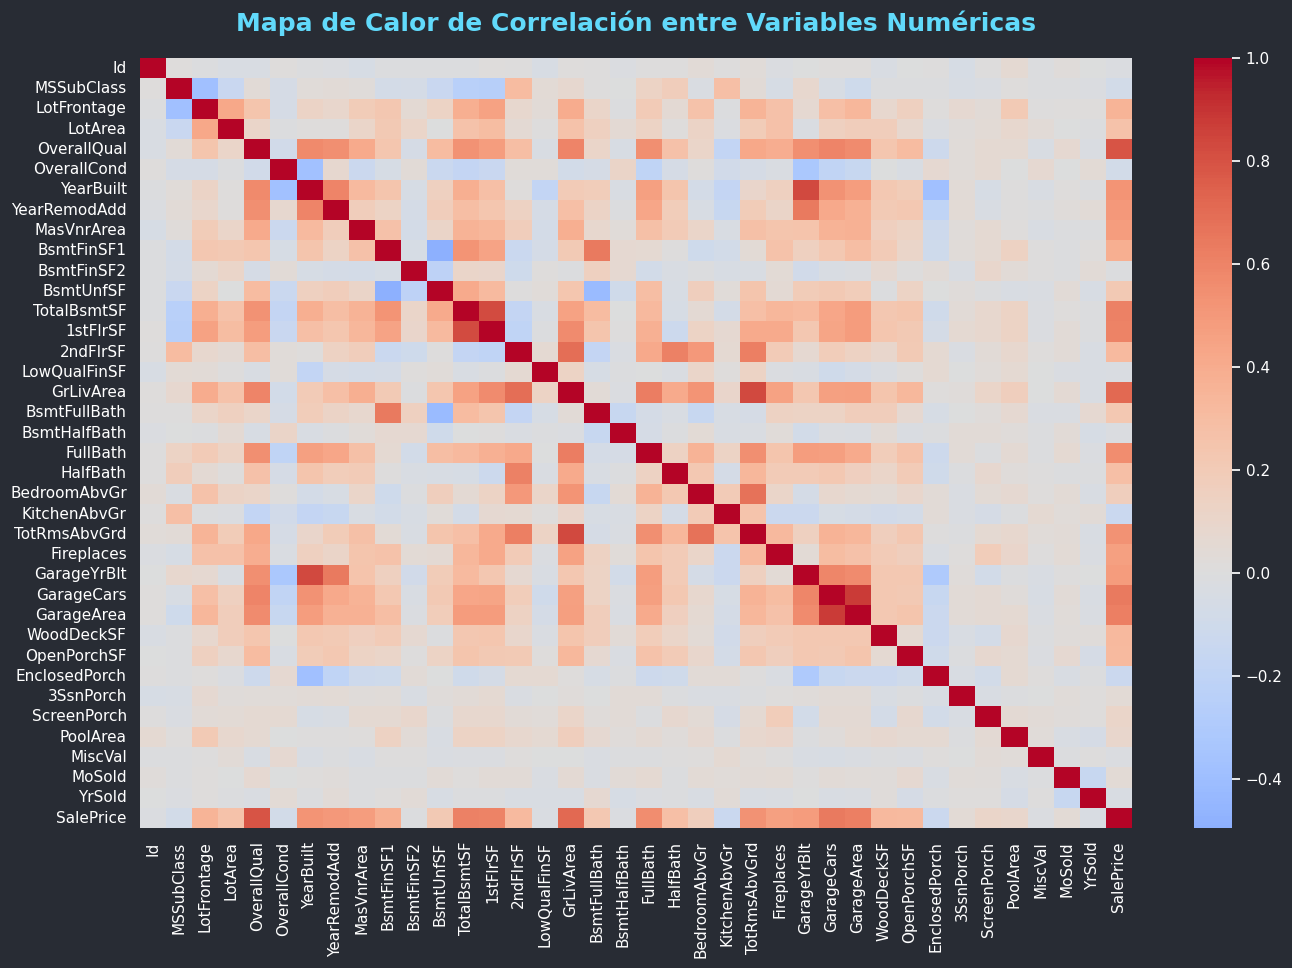

In [ ]:

# Calcula la matriz de correlación
corr = df.corr(numeric_only=True)

# Muestra el mapa de calor
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

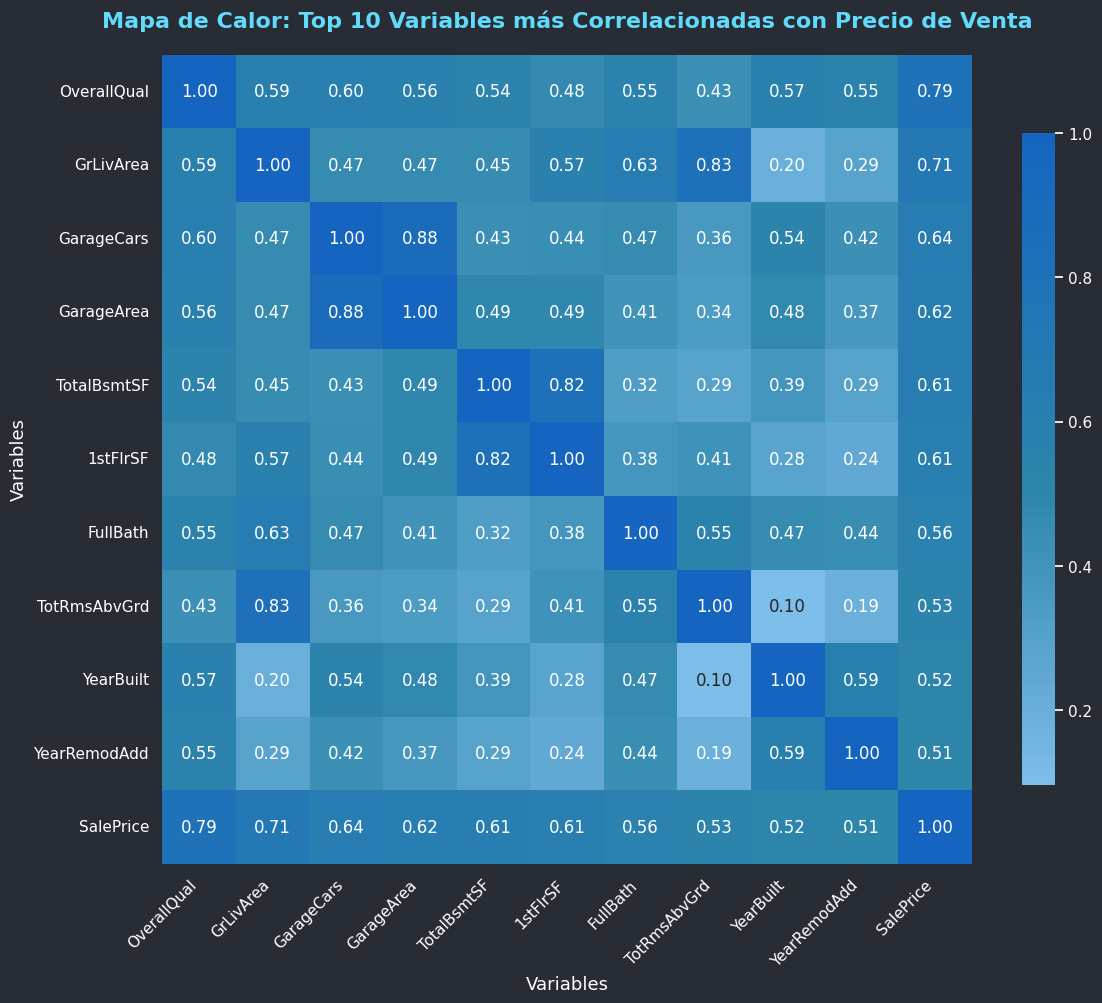

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 1. Calcula la matriz de correlación
corr = df.corr(numeric_only=True)

# 2. Selecciona las 10 variables más correlacionadas con SalePrice (excluyendo SalePrice)
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice').head(10).index

# 3. Crea una submatriz de correlación solo con esas variables + SalePrice
selected_vars = top_corr.tolist() + ['SalePrice']
corr_top = df[selected_vars].corr()

# 4. Crear colormap personalizado con tu paleta azul corporativo
# Para un gradiente más sofisticado con diferentes tonos de azul
colors = ['#F8F9FA', '#E3F2FD', '#90CAF9', '#2E86AB', '#1565C0']
custom_cmap = LinearSegmentedColormap.from_list("blue_gradient", colors, N=256)

# 5. Generar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_top,
    annot=True,
    fmt='.2f',
    cmap=custom_cmap,
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title('Mapa de Calor: Top 10 Variables más Correlacionadas con Precio de Venta',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=13)
plt.ylabel('Variables', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

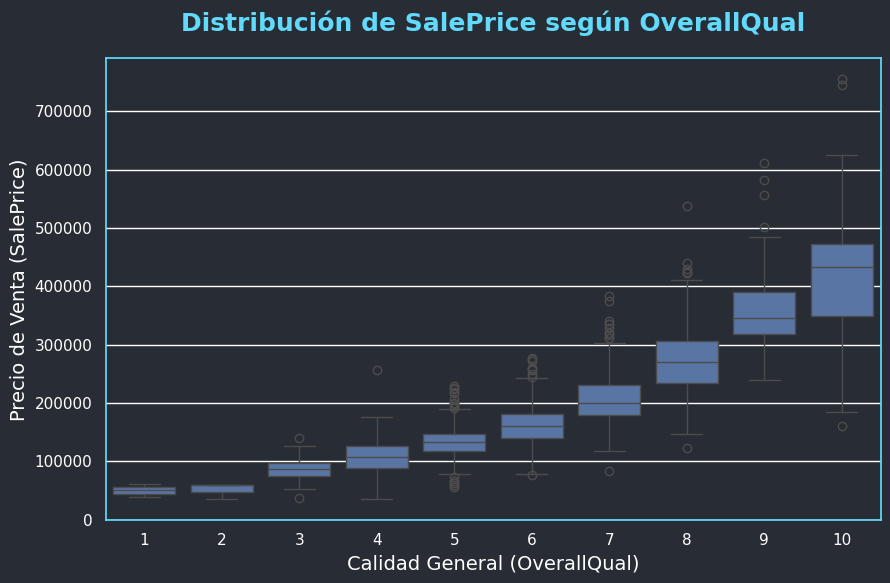

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Distribución de SalePrice según OverallQual')
plt.xlabel('Calidad General (OverallQual)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.show()

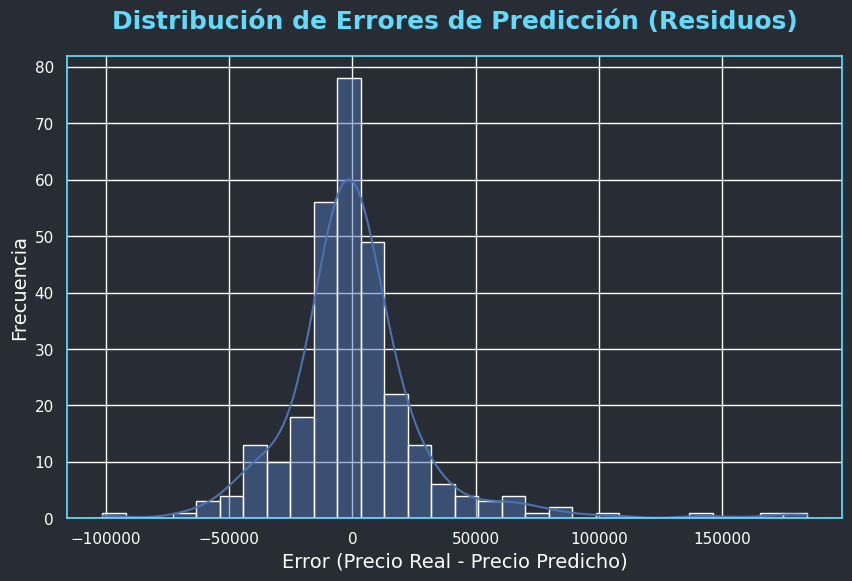

In [ ]:
# Calcula los residuos
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de Errores de Predicción (Residuos)')
plt.xlabel('Error (Precio Real - Precio Predicho)')
plt.ylabel('Frecuencia')
plt.show()

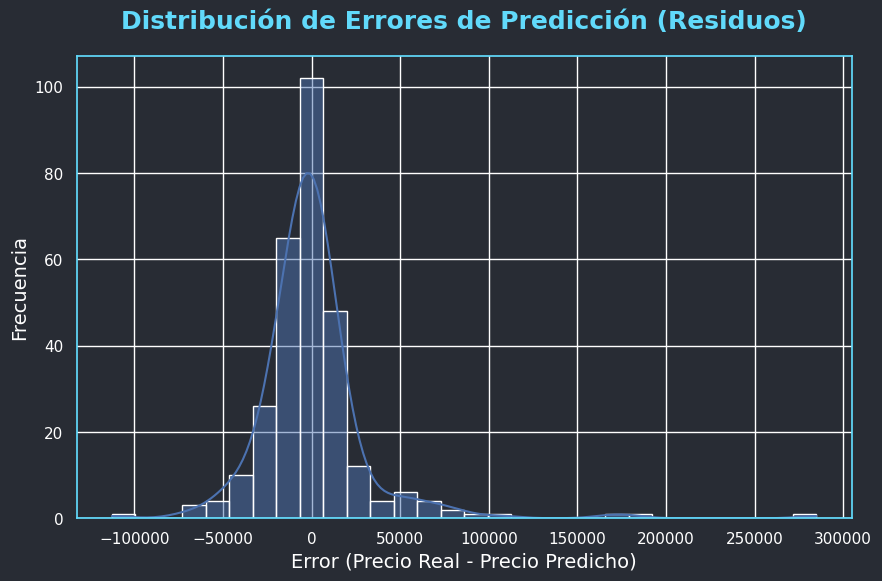

In [ ]:
predictions = best_model.predict(X_test)
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de Errores de Predicción (Residuos)')
plt.xlabel('Error (Precio Real - Precio Predicho)')
plt.ylabel('Frecuencia')
plt.show()

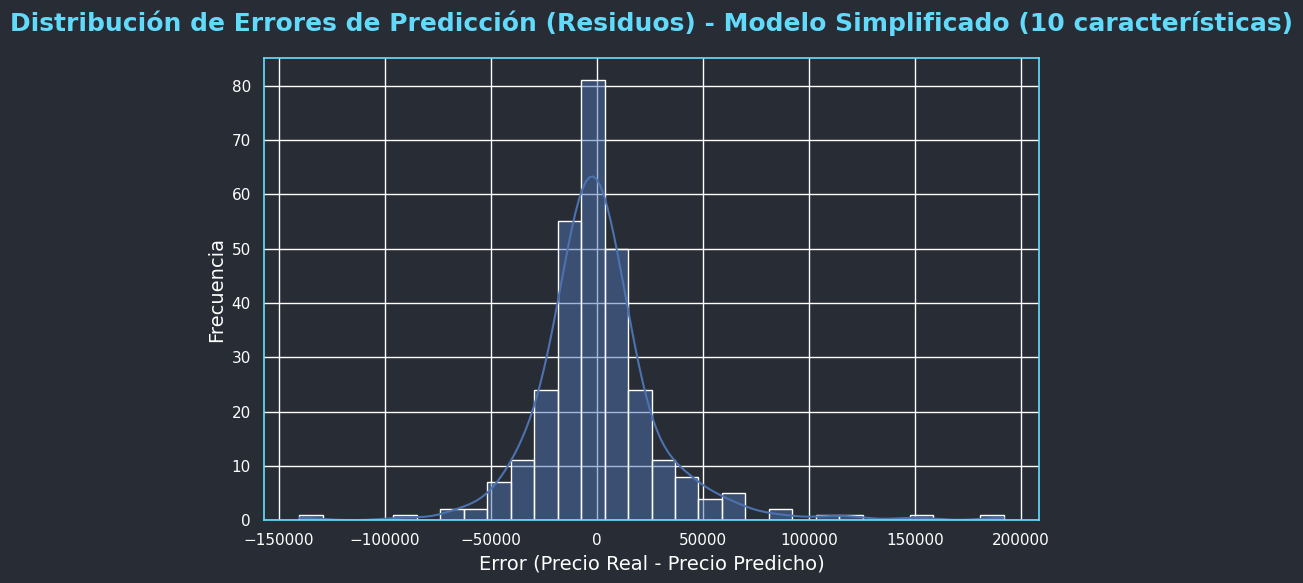

In [ ]:
# Calcula las predicciones con el modelo simplificado
predictions_s = best_simple_model.predict(X_test_s)

# Calcula los residuos (errores)
residuals_s = y_test_s - predictions_s

# Grafica el histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals_s, bins=30, kde=True)
plt.title('Distribución de Errores de Predicción (Residuos) - Modelo Simplificado (10 características)')
plt.xlabel('Error (Precio Real - Precio Predicho)')
plt.ylabel('Frecuencia')
plt.show()

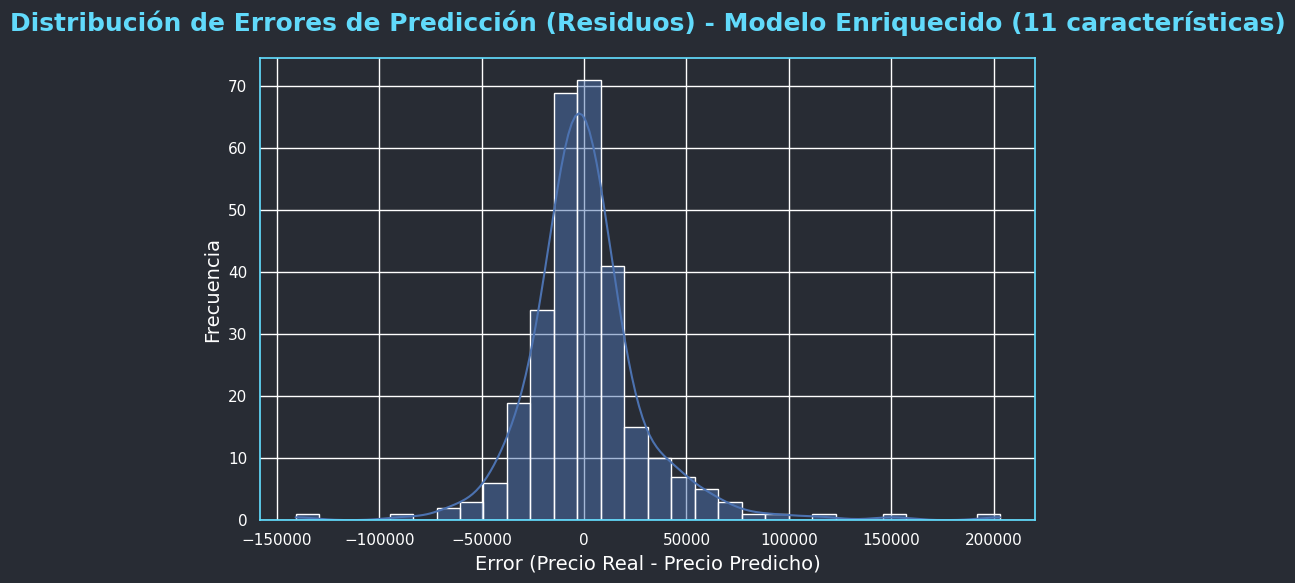

In [ ]:
# Calcula las predicciones con el modelo enriquecido
predictions_e = best_enriched_model.predict(X_test_e)

# Calcula los residuos (errores)
residuals_e = y_test_e - predictions_e

# Grafica el histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals_e, bins=30, kde=True)
plt.title('Distribución de Errores de Predicción (Residuos) - Modelo Enriquecido (11 características)')
plt.xlabel('Error (Precio Real - Precio Predicho)')
plt.ylabel('Frecuencia')
plt.show()

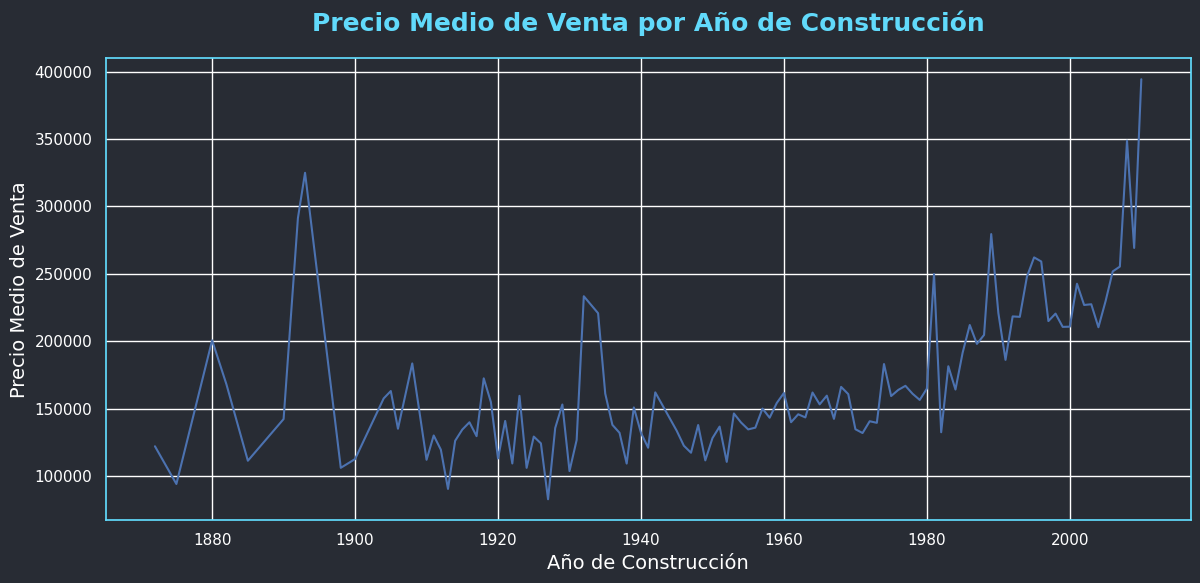

In [ ]:
# Agrupa por año y calcula el precio medio
year_price = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='YearBuilt', y='SalePrice', data=year_price)
plt.title('Precio Medio de Venta por Año de Construcción')
plt.xlabel('Año de Construcción')
plt.ylabel('Precio Medio de Venta')
plt.show()

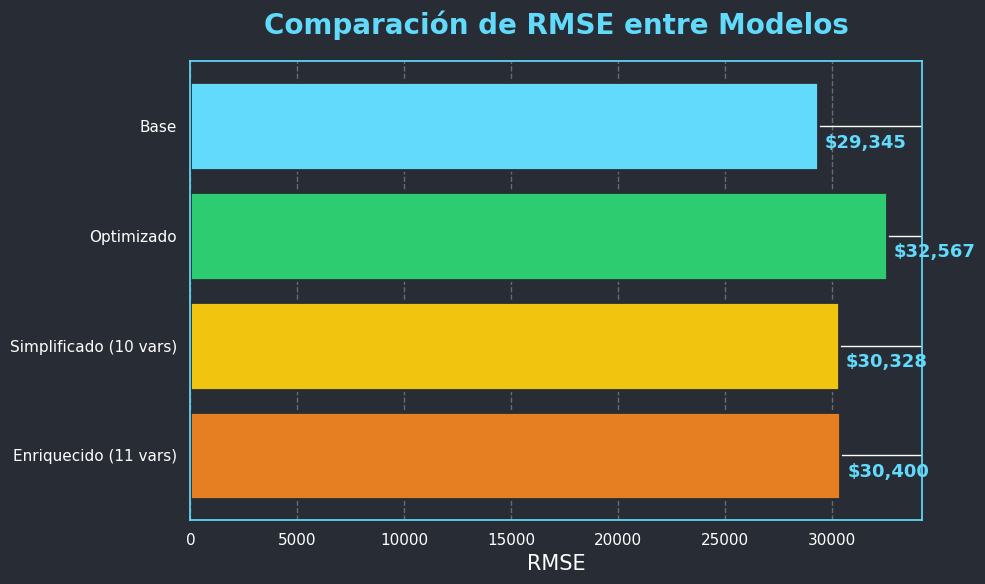

In [ ]:
# Nombres y valores de los modelos
model_names = [
    'Base',
    'Optimizado',
    'Simplificado (10 vars)',
    'Enriquecido (11 vars)'
]
rmse_values = [base_rmse, opt_rmse, rmse_s_tuned, rmse_e_tuned_simp]

# Colores inspirados en tu CSS
colors = ['#61dafb', '#2ecc71', '#f1c40f', '#e67e22']

plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, rmse_values, color=colors, edgecolor='#282c34', linewidth=2)

# Ajuste de desplazamiento vertical
offset = 0.15  # Puedes ajustar este valor según el tamaño de la barra

for bar, value in zip(bars, rmse_values):
    # Para poner la etiqueta un poco por encima de la barra:
    plt.text(
        value + max(rmse_values)*0.01,
        bar.get_y() + bar.get_height()/2 + offset,
        f"${value:,.0f}",
        va='center',
        fontsize=13,
        fontweight='bold',
        color='#61dafb'
    )
    # Si prefieres por debajo, usa: bar.get_y() + bar.get_height()/2 - offset

plt.title('Comparación de RMSE entre Modelos', fontsize=20, color='#61dafb', weight='bold')
plt.xlabel('RMSE', fontsize=15, color='white')
plt.gca().invert_yaxis()  # El mejor modelo arriba
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Este gráfico compara el error cuadrático medio (RMSE) obtenido por cada uno de los modelos evaluados. El RMSE es una métrica que refleja la precisión de las predicciones del modelo: valores más bajos indican un mejor desempeño. La visualización permite identificar rápidamente cuál de los modelos presenta menor error y, por lo tanto, mayor capacidad predictiva sobre los datos analizados.

#  EXPERIMENTO 4: MODELO DE CLASIFICACIÓN POR RANGO DE PRECIO

In [ ]:
# Ejemplo: Clasificación de casas por rango de precio (Ames Housing)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer # Importar SimpleImputer


# 2. Crear la variable categórica "PriceCategory" a partir de SalePrice
df["PriceCategory"] = pd.cut(
    df["SalePrice"],
    bins=[0, 150000, 250000, float("inf")],
    labels=["Bajo", "Medio", "Alto"]
)

# Eliminamos la columna original SalePrice ya que ahora tenemos la categoría
df_classification = df.drop('SalePrice', axis=1).copy()


# 3. Seleccionar variables predictoras (ejemplo: algunas numéricas y categóricas)
# Puedes ajustar esta lista según las características que quieras usar.
# Aquí usamos las 10 características más importantes del experimento simplificado
# más algunas categóricas relevantes.
features_classification = [
    "OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars",
    "GarageArea", "1stFlrSF", "YearBuilt", "YearRemodAdd",
    "FullBath", "TotRmsAbvGrd", # <-- Características numéricas del modelo simplificado
    "Neighborhood", "HouseStyle", "BldgType", "MSZoning" # <-- Algunas características categóricas
]

X_clf = df_classification[features_classification]
y_clf = df_classification["PriceCategory"]

# 4. Identificar columnas categóricas y numéricas dentro de las seleccionadas
categorical_cols_clf = X_clf.select_dtypes(include=['object', 'category']).columns
numeric_cols_clf = X_clf.select_dtypes(include=['int64', 'float64']).columns

# 5. Preprocesamiento: OneHot para categóricas, passthrough para numéricas
# También imputaremos nulos si los hay en las columnas seleccionadas.
preprocessor_clf = ColumnTransformer(
    transformers=[
        ("num", Pipeline([('imputer', SimpleImputer(strategy='median')), ('passthrough', 'passthrough')]), numeric_cols_clf),
        ("cat", Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown="ignore"))]), categorical_cols_clf)
    ],
    remainder='passthrough' # Mantener otras columnas si las hubiera (aunque aquí seleccionamos explícitamente)
)

# 6. Pipeline con RandomForest Classifier
clf_model = Pipeline(steps=[
    ("preprocessor", preprocessor_clf),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

# 7. Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# 8.Definir la grilla de hiperparámetros
param_dist = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [None, 5, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

#  RandomizedSearchCV
random_search = RandomizedSearchCV(
    clf_model,
    param_distributions=param_dist,
    n_iter=2,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)


print("Iniciando búsqueda de hiperparámetros para el modelo de clasificación...")
random_search.fit(X_train_clf, y_train_clf)
print("¡Ajuste completado!")

# 9. Mejor modelo y resultados
print("\nMejores hiperparámetros encontrados:")
print(random_search.best_params_)

print("\n--- Informe de Clasificación con el mejor modelo ---")
y_pred_best = random_search.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_best))



Iniciando búsqueda de hiperparámetros para el modelo de clasificación...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
¡Ajuste completado!

Mejores hiperparámetros encontrados:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20}

--- Informe de Clasificación con el mejor modelo ---
              precision    recall  f1-score   support

        Alto       1.00      0.65      0.78        48
        Bajo       0.90      0.92      0.91       139
       Medio       0.76      0.86      0.81       105

    accuracy                           0.85       292
   macro avg       0.89      0.81      0.83       292
weighted avg       0.86      0.85      0.85       292



In [ ]:
import joblib

joblib.dump(clf_model, 'house_price_classifier.pkl')

joblib.dump(features_classification, 'classifier_features.pkl')

print(f"¡Modelo guardado exitosamente como !")
print(f"¡Columnas del modelo guardadas como 'model_columns.pkl'!")

¡Modelo guardado exitosamente como !
¡Columnas del modelo guardadas como 'model_columns.pkl'!


Matriz de confusion


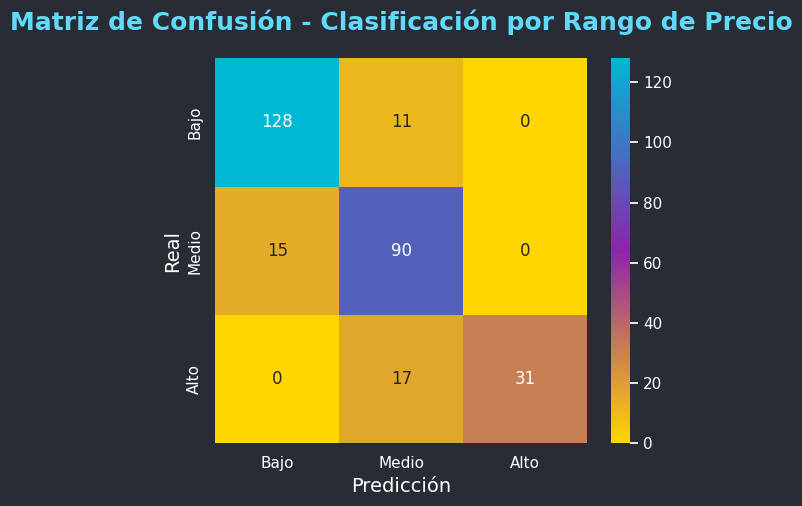

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Predecir en test
y_pred_best = random_search.predict(X_test_clf)

# Matriz de confusión
cm = confusion_matrix(y_test_clf, y_pred_best, labels=["Bajo", "Medio", "Alto"])

# Crear un colormap personalizado: amarillo, violeta, turquesa
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap", ["#FFD600", "#8E24AA", "#00B8D4"]  # amarillo, violeta, turquesa
)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap=custom_cmap,
    xticklabels=["Bajo", "Medio", "Alto"],
    yticklabels=["Bajo", "Medio", "Alto"]
)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Clasificación por Rango de Precio')
plt.show()

Conclusión:
El modelo nunca confunde extremos ("Bajo" vs "Alto"), lo cual es muy bueno.
La mayor confusión ocurre entre las clases "Medio" y "Alto", y en menor medida entre "Bajo" y "Medio".
La clase "Alto" es la más difícil para el modelo.

<Figure size 800x500 with 0 Axes>

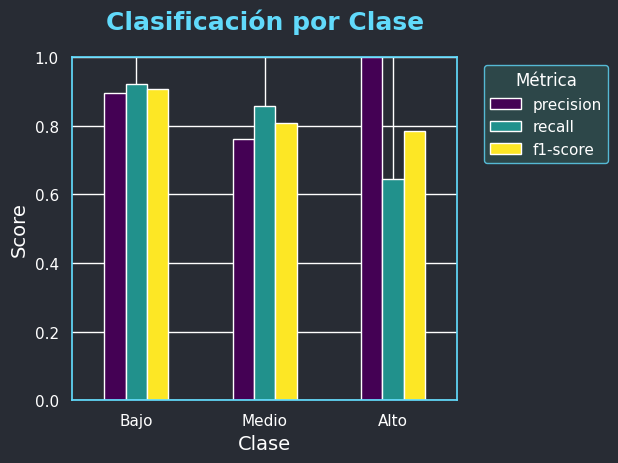

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# 1. Obtener el classification report como diccionario
y_pred_best = random_search.predict(X_test_clf)
report_dict = classification_report(y_test_clf, y_pred_best, output_dict=True, zero_division=0)

# 2. Convertir a DataFrame y filtrar solo las clases
classes = ["Bajo", "Medio", "Alto"]
metrics = ["precision", "recall", "f1-score"]
df_report = pd.DataFrame(report_dict).T.loc[classes, metrics]

# 3. Graficar
plt.figure(figsize=(8, 5))
ax = df_report.plot(kind='bar', ylim=(0,1), colormap='viridis')
plt.title('Clasificación por Clase')
plt.ylabel('Score')
plt.xlabel('Clase')
plt.xticks(rotation=0)

# Mover la leyenda fuera del gráfico
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Este gráfico presenta los principales indicadores de desempeño del modelo (precisión, recall y f1-score) para cada categoría de rango de precio. Permite evaluar la capacidad del modelo para clasificar correctamente las propiedades en los grupos Bajo, Medio y Alto, facilitando la comparación entre las distintas métricas y clases.